Loaded dataset for SSP1-1.9
Loaded dataset for SSP1-2.6
Loaded dataset for SSP2-4.5
Loaded dataset for SSP3-7.0
Loaded dataset for SSP5-8.5
Loaded observational dataset
Extracted Arctic_SIE for SSP1-1.9
Extracted Arctic_SIE for SSP1-2.6
Extracted Arctic_SIE for SSP2-4.5
Extracted Arctic_SIE for SSP3-7.0
Extracted Arctic_SIE for SSP5-8.5
Extracted CDR_SIE from observational dataset
Selected September observational data from 1980-01-01 to 2015-12-31
Observational mean (1980-2015): 6.1687
Observational standard deviation (1980-2015): 1.1249

Analyzing scenario: SSP1-1.9 (Original Data)
Collected durations and counts for SSP1-1.9
Earliest practically ice-free member: CanESM5_r3i1p1f1 in 2034
Latest practically ice-free member: CanESM5_r5i1p1f1 in 2049
Selected ensemble members:
  practical_only: CanESM5_r4i1p1f1


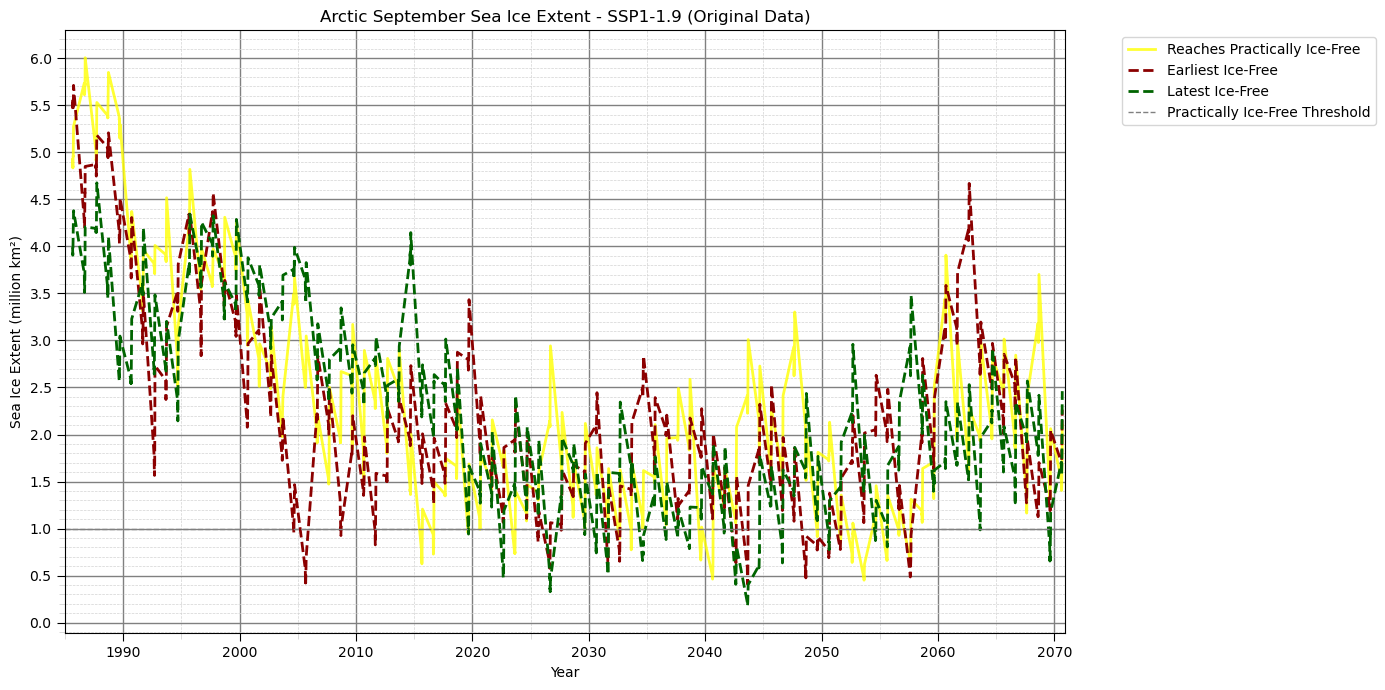

Plotted time series for SSP1-1.9 (Original Data)

Performing statistical analysis and pruning models...
Observational mean (1980-2015): 6.1687
Observational standard deviation (1980-2015): 1.1249

Total models: 6
Models kept: 6
Models pruned: 0

Analyzing scenario: SSP1-2.6 (Original Data)
Collected durations and counts for SSP1-2.6
Earliest practically ice-free member: ACCESS-CM2_r7i1p1f1 in 2025
Latest practically ice-free member: BCC-CSM2-MR_r1i1p1f1 in 2079
Selected ensemble members:
  practical_only: BCC-CSM2-MR_r1i1p1f1


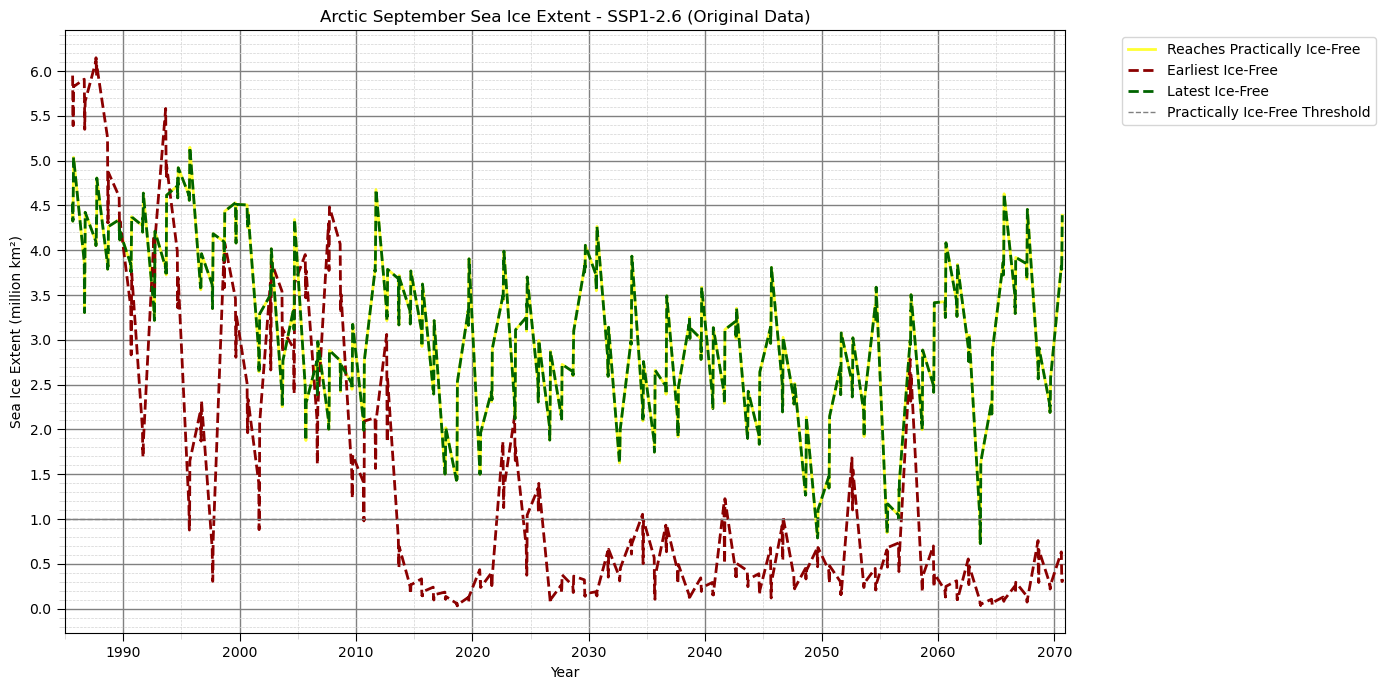

Plotted time series for SSP1-2.6 (Original Data)

Performing statistical analysis and pruning models...
Observational mean (1980-2015): 6.1687
Observational standard deviation (1980-2015): 1.1249

Total models: 11
Models kept: 11
Models pruned: 0

Analyzing scenario: SSP2-4.5 (Original Data)
Collected durations and counts for SSP2-4.5
Earliest practically ice-free member: ACCESS-CM2_r10i1p1f1 in 2020
Latest practically ice-free member: MIROC-ES2H_r2i1p4f2 in 2091
Selected ensemble members:
  practical_only: MPI-ESM1-2-LR_r50i1p1f1


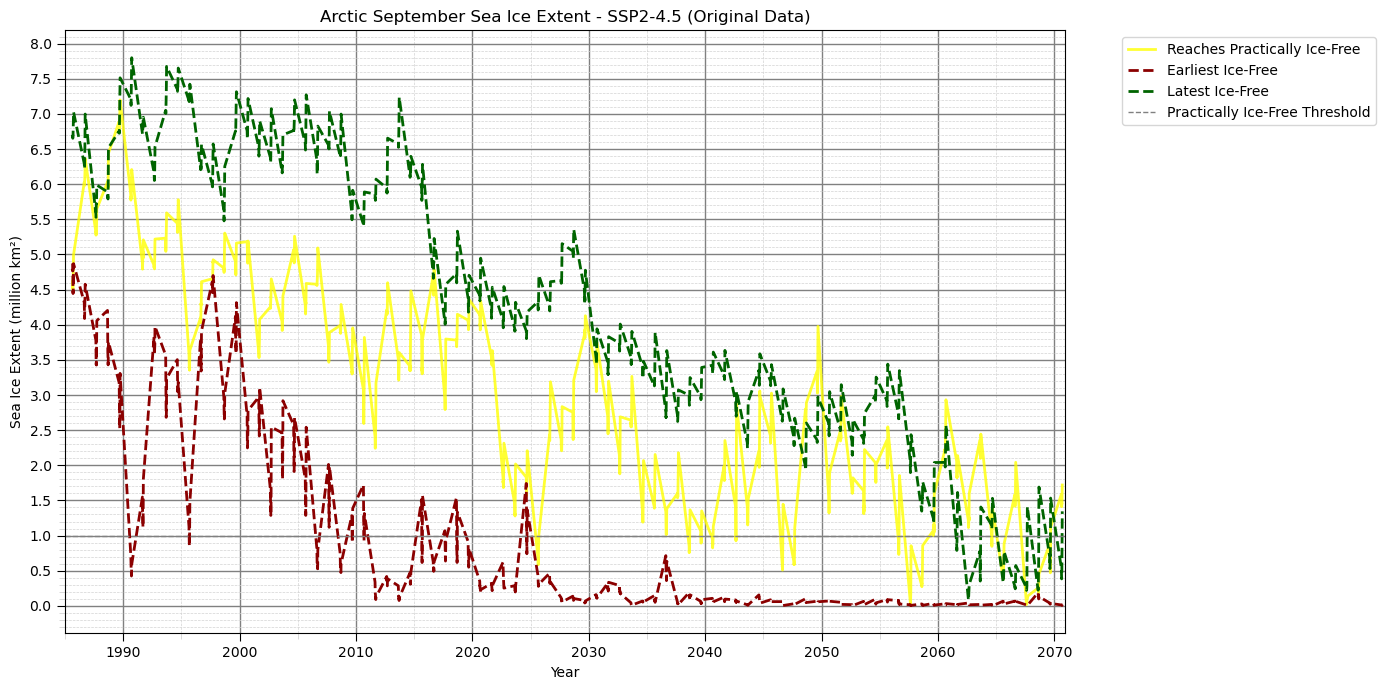

Plotted time series for SSP2-4.5 (Original Data)

Performing statistical analysis and pruning models...
Observational mean (1980-2015): 6.1687
Observational standard deviation (1980-2015): 1.1249

Total models: 9
Models kept: 9
Models pruned: 0

Analyzing scenario: SSP3-7.0 (Original Data)
Collected durations and counts for SSP3-7.0
Earliest practically ice-free member: ACCESS-CM2_r6i1p1f1 in 2028
Latest practically ice-free member: IPSL-CM5A2-INCA_r1i1p1f1 in 2080
Selected ensemble members:
  practical_only: NorESM2-LM_r1i1p1f1


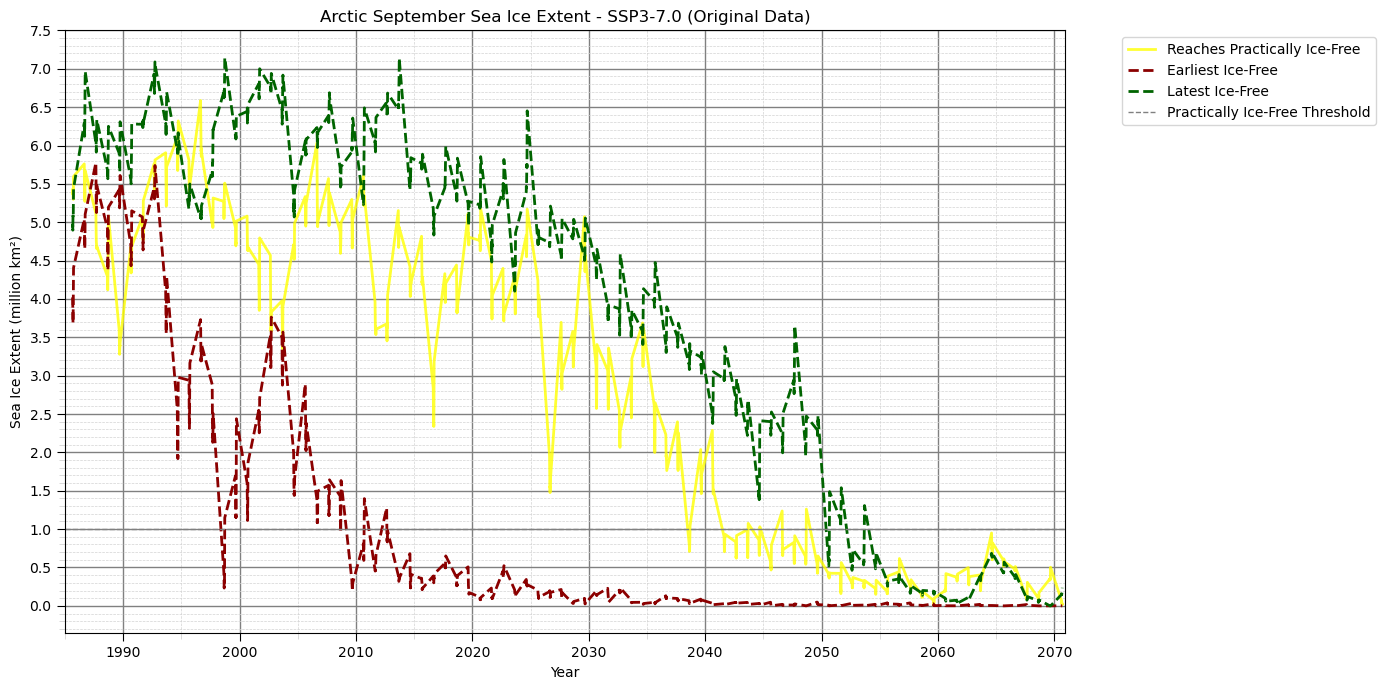

Plotted time series for SSP3-7.0 (Original Data)

Performing statistical analysis and pruning models...
Observational mean (1980-2015): 6.1687
Observational standard deviation (1980-2015): 1.1249

Total models: 8
Models kept: 8
Models pruned: 0

Analyzing scenario: SSP5-8.5 (Original Data)


In [ ]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.units as munits
import matplotlib.dates as mdates
import cftime
from matplotlib.ticker import MultipleLocator
from matplotlib.dates import YearLocator, DateFormatter
import seaborn as sns

# Register the cftime.datetime converter for plotting
munits.registry[cftime.datetime] = mdates.ConciseDateConverter()


class SeaIceAnalyzer:
    def __init__(self, data_path):
        self.data_path = data_path
        self.ssp_files = {
            'SSP1-1.9': 'Selected_hist_ssp119_daily_CMIP6_SIE_SIA.nc',
            'SSP1-2.6': 'Selected_hist_ssp126_daily_CMIP6_SIE_SIA.nc',
            'SSP2-4.5': 'Selected_hist_ssp245_daily_CMIP6_SIE_SIA.nc',
            'SSP3-7.0': 'Selected_hist_ssp370_daily_CMIP6_SIE_SIA.nc',
            'SSP5-8.5': 'Selected_hist_ssp585_daily_CMIP6_SIE_SIA.nc'
        }
        self.ssp_datasets = {}
        self.obs_dataset = None
        self.obs_sie = None
        self.obs_sie_sep = None
        self.last_obs_year = None
        self.scenario_stats = {}

    def load_all_datasets(self):
        for scenario_name, filename in self.ssp_files.items():
            dataset = xr.open_dataset(f"{self.data_path}{filename}")
            self.ssp_datasets[scenario_name] = dataset
            print(f"Loaded dataset for {scenario_name}")

        self.obs_dataset = xr.open_dataset(
            f"{self.data_path}NSIDC_CDR_daily_v4_SIA_SIE_197901-202312_no_leap.nc"
        )
        print("Loaded observational dataset")

    def extract_sea_ice_extent_variables(self):
        self.ssp_sie_data = {}
        for scenario_name, dataset in self.ssp_datasets.items():
            self.ssp_sie_data[scenario_name] = dataset['Arctic_SIE']
            print(f"Extracted Arctic_SIE for {scenario_name}")
        self.obs_sie = self.obs_dataset['CDR_SIE']
        print("Extracted CDR_SIE from observational dataset")

    def select_september_observational_data(self, start_year='1980-01-01', end_year='2015-12-31'):
        self.obs_sie_sep = self.obs_sie.sel(time=self.obs_sie['time.month'] == 9)
        self.obs_sie_sep = self.obs_sie_sep.sel(time=slice(start_year, end_year))
        self.last_obs_year = self.obs_sie_sep['time'].dt.year.max().values
        print(f"Selected September observational data from {start_year} to {end_year}")

    def extract_and_print_observation_stats(self):
        obs_mean = self.obs_sie_sep.mean().values.item()
        obs_std = self.obs_sie_sep.std().values.item()
        print(f"Observational mean (1980-2015): {obs_mean:.4f}")
        print(f"Observational standard deviation (1980-2015): {obs_std:.4f}")
        return obs_mean, obs_std

    def perform_statistical_analysis_and_prune_models(self, scenario_name):
        print("\nPerforming statistical analysis and pruning models...")

        obs_mean, obs_std = self.extract_and_print_observation_stats()

        scenario_sie_data = self.ssp_sie_data[scenario_name]
        scenario_sie_sep = scenario_sie_data.sel(time=scenario_sie_data['time.month'] == 9)
        ensemble_members = scenario_sie_sep['GCM'].values
        models_to_keep = []
        discarded_models = []

        model_names = set(member.split('_')[0] for member in ensemble_members)

        for model_name in model_names:
            members = [member for member in ensemble_members if member.startswith(model_name)]
            keep_model = False

            for member in members:
                member_sie = scenario_sie_sep.sel(GCM=member)
                member_sie_hist = member_sie.sel(time=slice('1980-01-01', '2015-12-31'))
                obs_sie_aligned, member_sie_hist_aligned = xr.align(self.obs_sie_sep, member_sie_hist, join='inner')
                diff = member_sie_hist_aligned - obs_sie_aligned
                diff_mean = diff.mean().values.item()

                if np.abs(diff_mean) <= 3 * obs_std:
                    keep_model = True
                    break

            if keep_model:
                models_to_keep.extend(members)
            else:
                discarded_models.append(model_name)
                print(f"Discarding model {model_name} and all its ensemble members")

        total_models = len(model_names)
        pruned_models = len(discarded_models)
        kept_models = total_models - pruned_models
        print(f"\nTotal models: {total_models}")
        print(f"Models kept: {kept_models}")
        print(f"Models pruned: {pruned_models}")

        pruned_scenario_sie_data = scenario_sie_data.sel(GCM=models_to_keep)
        return pruned_scenario_sie_data, pruned_models

    def analyze_scenario(self, scenario_name, scenario_sie_data, use_pruned_data=False):
        data_label = 'Pruned Data' if use_pruned_data else 'Original Data'
        print(f"\nAnalyzing scenario: {scenario_name} ({data_label})")
        scenario_sie_sep = scenario_sie_data.sel(time=scenario_sie_data['time.month'] == 9)
        ensemble_members = scenario_sie_sep['GCM'].values

        if not ensemble_members.size:
            print(f"No ensemble members left for {scenario_name} after pruning.")
            return

        durations_list, ice_free_counts, member_stats = self.collect_duration_and_counts(
            scenario_name, scenario_sie_sep, ensemble_members
        )

        earliest_member, latest_member = self.find_earliest_and_latest_ice_free_members(
            scenario_sie_sep, ensemble_members
        )

        selected_members = self.select_representative_ensemble_members(scenario_sie_sep)

        self.plot_scenario_time_series(
            scenario_name, scenario_sie_sep, earliest_member, latest_member, selected_members, use_pruned_data
        )

        self.scenario_stats[scenario_name] = {
            'durations_list': durations_list,
            'ice_free_counts': ice_free_counts,
            'member_stats': member_stats,
            'use_pruned_data': use_pruned_data
        }

    def find_earliest_and_latest_ice_free_members(self, scenario_sie_sep, ensemble_members):
        earliest_pif_year = np.inf
        latest_pif_year = -np.inf
        earliest_member = None
        latest_member = None

        for member in ensemble_members:
            member_sie = scenario_sie_sep.sel(GCM=member)
            pif_year, _ = self.find_ice_free_years_for_member(member_sie)

            if pif_year is not None and 2015 <= pif_year <= 2100:
                if pif_year < earliest_pif_year:
                    earliest_pif_year = pif_year
                    earliest_member = member
                if pif_year > latest_pif_year:
                    latest_pif_year = pif_year
                    latest_member = member

        if earliest_member:
            print(f"Earliest practically ice-free member: {earliest_member} in {int(earliest_pif_year)}")
        else:
            print("No member reaches practically ice-free conditions within 2015-2100.")

        if latest_member:
            print(f"Latest practically ice-free member: {latest_member} in {int(latest_pif_year)}")
        else:
            print("No member reaches practically ice-free conditions within 2015-2100.")

        return earliest_member, latest_member

    def find_ice_free_years_for_member(self, member_sie, practical_threshold=1.0, actual_threshold=0.00001):
        values = member_sie.values
        times = member_sie['time']
        practical_indices = np.where(values <= practical_threshold)[0]
        actual_indices = np.where(values <= actual_threshold)[0]

        practical_year = times[practical_indices[0]].dt.year.item() if practical_indices.size else None
        if practical_year and not (2015 <= practical_year <= 2100):
            practical_year = None

        actual_year = times[actual_indices[0]].dt.year.item() if actual_indices.size else None
        if actual_year and not (2015 <= actual_year <= 2100):
            actual_year = None

        return practical_year, actual_year

    def select_representative_ensemble_members(self, scenario_sie_sep):
        ensemble_members = scenario_sie_sep['GCM'].values
        selected_members = {'practical_only': None}
        min_difference = {'practical_only': np.inf}

        for member in ensemble_members:
            member_sie = scenario_sie_sep.sel(GCM=member)
            member_sie_hist = member_sie.sel(time=slice('1980-01-01', '2015-12-31'))
            obs_sie_aligned, member_sie_hist_aligned = xr.align(self.obs_sie_sep, member_sie_hist, join='inner')

            member_last_value = member_sie_hist_aligned.isel(time=-1).values.mean()
            obs_last_value = obs_sie_aligned.isel(time=-1).values.mean()
            last_diff = abs(member_last_value - obs_last_value)

            pif_year, aif_year = self.find_ice_free_years_for_member(member_sie)

            if pif_year and not aif_year:
                category = 'practical_only'
                if last_diff < min_difference[category]:
                    min_difference[category] = last_diff
                    selected_members[category] = member

        print("Selected ensemble members:")
        for category, member in selected_members.items():
            print(f"  {category}: {member}")
        return selected_members

    def collect_duration_and_counts(self, scenario_name, scenario_sie_sep, ensemble_members):
        durations_list = []
        ice_free_counts = []
        no_practical_count = 0
        no_actual_count = 0
        member_stats = []

        for member in ensemble_members:
            member_sie = scenario_sie_sep.sel(GCM=member)
            pif_year, aif_year = self.find_ice_free_years_for_member(member_sie)
            duration = None

            if pif_year and aif_year:
                duration = aif_year - pif_year
                durations_list.append({'Scenario': scenario_name, 'Duration': duration})

            if not pif_year:
                no_practical_count += 1
            if not aif_year:
                no_actual_count += 1

            member_stats.append({
                'Scenario': scenario_name,
                'Ensemble Member': member,
                'PIF Year': pif_year,
                'AIF Year': aif_year,
                'Duration': duration
            })

        ice_free_counts.append({
            'Scenario': scenario_name,
            'Never Practically Ice-Free': no_practical_count,
            'Never Actually Ice-Free': no_actual_count
        })
        print(f"Collected durations and counts for {scenario_name}")
        return durations_list, ice_free_counts, member_stats

    def plot_scenario_time_series(self, scenario_name, scenario_sie_sep,
                                  earliest_member, latest_member, selected_members, use_pruned_data):
        """Plot the time series of sea ice extent for a given scenario."""
        plt.figure(figsize=(14, 7))

        # Plot from 2015 onwards
        future_sie = scenario_sie_sep.sel(time=slice('2015-01-01', '2100-12-31'))

        # Plot selected ensemble member 'practical_only' in yellow
        member = selected_members.get('practical_only')
        if member:
            member_sie = future_sie.sel(GCM=member)
            member_time = member_sie['time'].values
            plt.plot(member_time, member_sie.values, color='yellow', linewidth=2, alpha=0.8, label='Reaches Practically Ice-Free')

        # Plot earliest and latest ensemble members
        if earliest_member:
            earliest_sie = future_sie.sel(GCM=earliest_member)
            plt.plot(earliest_sie['time'].values, earliest_sie.values, color='darkred', linestyle='--', linewidth=2, label='Earliest Ice-Free')

        if latest_member:
            latest_sie = future_sie.sel(GCM=latest_member)
            plt.plot(latest_sie['time'].values, latest_sie.values, color='darkgreen', linestyle='--', linewidth=2, label='Latest Ice-Free')

        # Plot Practically Ice-Free Threshold
        plt.axhline(y=1, color='gray', linestyle='--', label='Practically Ice-Free Threshold', linewidth=1)

        # Configure axes
        ax = plt.gca()
        ax.set_xlim(cftime.DatetimeNoLeap(2015, 1, 1), cftime.DatetimeNoLeap(2100, 12, 31))
        ax.xaxis.set_major_locator(YearLocator(10))
        ax.xaxis.set_major_formatter(DateFormatter('%Y'))
        ax.xaxis.set_minor_locator(YearLocator(5))
        ax.yaxis.set_major_locator(MultipleLocator(0.5))
        ax.yaxis.set_minor_locator(MultipleLocator(0.1))

        plt.tick_params(axis='x', which='major', length=6)
        plt.tick_params(axis='x', which='minor', length=4, color='lightgray')
        plt.tick_params(axis='y', which='major', length=6)
        plt.tick_params(axis='y', which='minor', length=4, color='lightgray')

        plt.grid(which='minor', linestyle='--', linewidth=0.5, color='lightgray')
        plt.grid(which='major', linestyle='-', linewidth=1, color='gray')

        plt.xlabel('Year')
        plt.ylabel('Sea Ice Extent (million km²)')
        data_label = 'Pruned Data' if use_pruned_data else 'Original Data'
        plt.title(f'Arctic September Sea Ice Extent - {scenario_name} ({data_label})')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()
        print(f"Plotted time series for {scenario_name} ({data_label})")

    def plot_duration_histogram(self, durations_list, use_pruned_data=False):
        if not durations_list:
            print("No data to plot in duration histogram.")
            return

        durations_df = pd.DataFrame(durations_list)
        durations_df = durations_df[durations_df['Duration'] > 0]

        if durations_df.empty:
            print("No data to plot in duration histogram after filtering.")
            return

        plt.figure(figsize=(12, 6))
        scenarios = durations_df['Scenario'].unique()
        bins = np.arange(1, durations_df['Duration'].max() + 2) - 0.5

        for scenario in scenarios:
            scenario_data = durations_df[durations_df['Scenario'] == scenario]
            plt.hist(scenario_data['Duration'], bins=bins, alpha=0.5, label=scenario)

        plt.xlabel('Time Between Practically and Actually Ice-Free Conditions (Years)')
        plt.ylabel('Frequency')
        data_label = 'Pruned Data' if use_pruned_data else 'Original Data'
        plt.title(f'Duration Histogram ({data_label})')
        plt.legend()
        plt.grid(axis='y', linestyle='--')
        plt.tight_layout()
        plt.show()
        print(f"Plotted histogram of durations ({data_label})")

    def plot_ice_free_condition_counts(self, ice_free_counts, use_pruned_data=False):
        df = pd.DataFrame(ice_free_counts)
        df.set_index('Scenario', inplace=True)

        if df.empty:
            print("No data to plot in ice-free condition counts.")
            return

        df.plot(kind='bar', figsize=(10, 6))

        plt.ylabel('Number of Ensemble Members')
        data_label = 'Pruned Data' if use_pruned_data else 'Original Data'
        plt.title(f'Ensemble Members Not Reaching Ice-Free Conditions ({data_label})')
        plt.grid(axis='y', linestyle='--')
        plt.tight_layout()
        plt.show()
        print(f"Plotted counts of ensemble members not reaching ice-free conditions ({data_label})")

    def create_comprehensive_visualization(self):
        all_member_stats = []
        for scenario_name, stats in self.scenario_stats.items():
            member_stats = stats.get('member_stats', [])
            all_member_stats.extend(member_stats)

        if not all_member_stats:
            print("No data available for comprehensive visualization.")
            return

        df = pd.DataFrame(all_member_stats)

        self.extract_and_print_observation_stats()

        # Filter data for years between 2015 and 2100
        df = df[(df['PIF Year'] >= 2015) & (df['PIF Year'] <= 2100)]

        df_pif = df.dropna(subset=['PIF Year'])
        if not df_pif.empty:
            plt.figure(figsize=(12, 6))
            sns.boxplot(x='Scenario', y='PIF Year', data=df_pif)
            sns.swarmplot(x='Scenario', y='PIF Year', data=df_pif, color=".25")
            plt.title('Distribution of Practically Ice-Free Years per Scenario')
            plt.ylabel('Year')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

        df_duration = df.dropna(subset=['Duration'])
        if not df_duration.empty:
            plt.figure(figsize=(12, 6))
            sns.boxplot(x='Scenario', y='Duration', data=df_duration)
            sns.swarmplot(x='Scenario', y='Duration', data=df_duration, color=".25")
            plt.title('Durations between Practically and Actually Ice-Free Conditions per Scenario')
            plt.ylabel('Duration (Years)')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

        ice_free_counts_list = []
        for stats in self.scenario_stats.values():
            ice_free_counts = stats.get('ice_free_counts', [])
            ice_free_counts_list.extend(ice_free_counts)

        ice_free_df = pd.DataFrame(ice_free_counts_list)
        ice_free_df.set_index('Scenario', inplace=True)
        if not ice_free_df.empty:
            ice_free_df.plot(kind='bar', stacked=False, figsize=(12, 6))
            plt.ylabel('Number of Ensemble Members')
            plt.title('Ensemble Members Not Reaching Ice-Free Conditions per Scenario')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
        else:
            print("No data available for ice-free condition counts.")

        print("Comprehensive visualization created.")


def main():
    data_path = '/pl/active/courses/2024_fall/ATOC_3700/data/'
    analyzer = SeaIceAnalyzer(data_path)

    analyzer.load_all_datasets()
    analyzer.extract_sea_ice_extent_variables()
    analyzer.select_september_observational_data()
    analyzer.extract_and_print_observation_stats()

    for scenario_name in analyzer.ssp_files.keys():
        scenario_sie_data = analyzer.ssp_sie_data[scenario_name]
        analyzer.analyze_scenario(scenario_name, scenario_sie_data, use_pruned_data=False)

        pruned_scenario_sie_data, pruned_models = analyzer.perform_statistical_analysis_and_prune_models(scenario_name)

        if pruned_models > 0:
            analyzer.analyze_scenario(scenario_name, pruned_scenario_sie_data, use_pruned_data=True)

    analyzer.create_comprehensive_visualization()


if __name__ == "__main__":
    main()
